In [2]:
from __future__ import print_function
import librosa

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = "song.ogg"

In [5]:
y, sr = librosa.load(filename, 8000)

In [6]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
len(y)

1816277

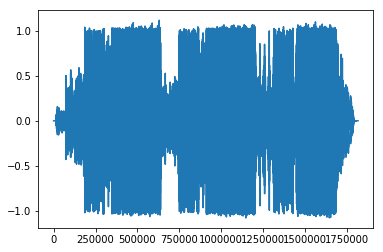

In [8]:
plt.plot(range(len(y)),y)

In [10]:
tempo = np.round(librosa.beat.tempo(y, sr=sr))

In [11]:
length = librosa.get_duration(y=y,sr=sr)

In [12]:
length

227.034625

In [13]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [29]:
#This function takes an int representing the BPM, a float representing how long the song is in secs, and
#a long int representing the file size. This information is used to create a list containing the start 
#and endpoints for blocks.

def blockList(BPM, secs, fileSize,y):
    mins = secs / 60.0 #how many minutes long is the song
    numBeats = int(BPM * mins) #the number of beats in the song
    numChunks = numBeats * 4 #the total number of chunks
    chunkSize = int(fileSize / numChunks) #how many points there are in a chunk

    chunker = chunks(y, int(chunkSize))
    List = [np.abs(np.fft.fft(next(chunker)))[0:int(chunkSize/2)+1] for i in range(int(numChunks))]

    print("minutes   :", mins)
    print("num beats :", numBeats)
    print("num chunks:", numChunks)
    print("chunk size:", chunkSize)        
    
    return List
    

In [30]:
chunkedList = blockList(tempo, length, len(y), y)

minutes   : 3.7839104166666666
num beats : 507
num chunks: 2028
chunk size: 895


In [27]:
chunkedList

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 